<a href="https://colab.research.google.com/github/Jolanta27/AI-course/blob/master/Dengue_prediction_project_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving final.csv to final (1).csv


In [9]:
import pandas as pd
df = pd.read_csv("final.csv")
df.head(10)

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal
5,5,28.279675,20.695122,23.818699,29.506504,20.695122,24.056098,19.927642,80.494309,4.219911,...,0.000000,59.769919,7.062602,195.847967,16.925203,7.008130,0.853659,0.983740,9669.0,normal
6,6,32.060163,25.723577,28.496748,38.978049,27.621951,33.214634,24.824390,81.698374,6.349325,...,1003.519512,57.928455,3.264228,196.900000,17.007317,6.788618,1.447154,0.000000,6772.0,normal
7,7,34.237398,26.526016,29.847967,41.382114,28.377236,34.901626,24.558537,74.819512,8.959569,...,1008.212195,56.070732,6.056098,169.027642,14.573171,5.967480,0.544715,1.869919,10342.0,normal
8,8,34.460976,23.867480,28.787805,39.463415,24.445528,32.002439,21.492683,67.514634,4.517886,...,1003.942276,29.597561,2.595122,238.502439,20.600813,7.731707,1.756098,1.000000,12542.0,normal
9,9,30.769106,23.066667,26.313821,36.357724,23.066667,28.114634,24.065854,88.390244,11.597561,...,1010.143089,78.597561,3.722764,208.988618,18.047967,7.382114,2.422764,0.764228,150.0,normal


In [10]:
print(df.dtypes)

serial                int64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
conditions          float64
stations            float64
cases               float64
labels               object
dtype: object


# **Wprowadzenie do problemów regresji i klasyfikacji:**
W analizie danych często spotykamy się z dwoma głównymi typami problemów: regresją i klasyfikacją. W przypadku regresji celem jest przewidzenie dokładnej wartości liczbowej na podstawie zestawu cech. W przypadku klasyfikacji przypisanie danych wejściowych do jednej z kilku kategorii.

W tym projekcie pracuję z danymi dotyczącymi liczby przypadków i ich związku z warunkami środowiskowymi i pogodowymi. Moim celem jest:

**Regresja:** Przewidzenie dokładnej liczby przypadków przy użyciu warunków środowiskowych i pogodowych

**Klasyfikacja:** Klasyfikacja liczby przypadków na kategorie (np. niska, średnia, wysoka dotkliwość) przy użyciu kategorycznej etykiety dostarczonej w zbiorze danych

# **Przegląd zbioru danych:**
**Czynniki środowiskowe i pogodowe:**

**Temperatura:** Średnia temperatura w danym okresie

**Wilgotność:** Średnia wilgotność powietrza

**Opady:** Ilość opadów w danym okresie

**Śnieg:** Ilość opadów śniegu

**Prędkość wiatru:** Średnia prędkość wiatru

**Promieniowanie słoneczne:** Ilość promieniowania słonecznego

**Dodatkowe czynniki:**

**Feelslike:** Odczuwalna temperatura, która może różnić się od rzeczywistej temperatury

**Punkt rosy:** Temperatura, przy której powietrze jest nasycone parą wodną

**Zmienna docelowa**

**Przypadki:** Liczba przypadków, którą chcemy przewidzieć (do analizy regresji)

**Etykiety:** Kategoryczna etykieta liczby przypadków (np. niska, średnia, wysoka dotkliwość) do celów klasyfikacji

# **Wprowadzenie do zbioru danych**

Zbiór danych zawiera informacje o liczbie przypadków oraz warunkach środowiskowych i pogodowych, które mogą wpływać na te przypadki. Moim celem jest zrozumienie, jak te czynniki wpływają na liczbę przypadków oraz jak mogę wykorzystać te informacje do przewidywania i klasyfikacji.

### Opis Cech Zbioru Danych

1. **Temperatura**: Mierzona w stopniach Celsjusza, jest to średnia temperatura w danym okresie.
2. **Wilgotność**: Mierzona w procentach, jest to średnia wilgotność powietrza.
3. **Opady**: Mierzone w milimetrach, jest to ilość opadów w danym okresie.
4. **Śnieg**: Mierzony w centymetrach, jest to ilość opadów śniegu.
5. **Prędkość Wiatru**: Mierzona w metrach na sekundę, jest to średnia prędkość wiatru.
6. **Promieniowanie Słoneczne**: Mierzone w kilowatogodzinach na metr kwadratowy, jest to ilość promieniowania słonecznego.
7. **Feelslike**: Odczuwalna temperatura, która może różnić się od rzeczywistej temperatury.
8. **Punkt Rosy**: Temperatura, przy której powietrze jest nasycone parą wodną.
9. **Przypadki**: Liczba przypadków, którą chcemy przewidzieć (zmienna docelowa dla regresji).
10. **Etykiety**: Kategoryczna etykieta liczby przypadków (zmienna docelowa dla klasyfikacji).

### Podsumowanie

W tym projekcie analizuję, jak warunki środowiskowe i pogodowe wpływają na liczbę przypadków. Wykorzystuję te informacje do przewidywania dokładnej liczby przypadków (regresja) oraz do klasyfikacji liczby przypadków na kategorie (klasyfikacja). Dzięki temu mogę lepiej zrozumieć, jakie czynniki mają największy wpływ na liczbę przypadków i jak można wykorzystać te informacje do podejmowania lepszych decyzji.



Użyłam komendy describe() po to, aby szybko uzyskać ogólny obraz struktury i charakterystyki danych numerycznych

In [11]:
print(df.describe())

           serial     tempmax     tempmin        temp  feelslikemax  \
count  602.000000  602.000000  602.000000  602.000000    602.000000   
mean   300.500000   31.918079   24.588318   27.813181     38.476069   
std    173.926709    2.737215    2.727919    2.412416      4.776400   
min      0.000000   25.000000   12.740000   18.820000     25.000000   
25%    150.250000   30.025000   23.200000   26.500000     35.600000   
50%    300.500000   31.700000   25.000000   27.900000     38.400000   
75%    450.750000   33.600000   26.500000   29.448171     41.900000   
max    601.000000   41.200000   29.400000   33.300000     49.600000   

       feelslikemin   feelslike         dew    humidity      precip  ...  \
count    602.000000  602.000000  602.000000  602.000000  602.000000  ...   
mean      25.613154   31.485111   23.984349   81.254786   13.120862  ...   
std        4.178797    4.672951    2.668014    9.406354   28.463365  ...   
min       12.360000   18.626667    4.480000   40.833333 

Według statystyki opisowej, dane obejmują 602 obserwacje dla każdej zmiennej. Zmienna serial sugeruje, że mam do czynienia z danymi szeregu czasowego przez ok 1.5 roku (602 dni). Średnia liczba przypadków wynosi 8502, ale z bardzo dużym odchyleniem standardowym - 6780. Liczba przypadków waha się od 52 do 24983, co sugeruje duże zróżnicowanie w czasie.

# **Plan działania:**
# **Zbiór danych pochodzi z Kaggle**
**Esploracyjna analiza danych**

- Wizualizacja rozkładów danych
- Korelacja między cechami
- Relacje między cechami a zmiennymi docelowymi
- Identyfikacja anomalii i wartości odstających

**Czyszczenie danych**

- Usuwanie brakujących danych
- Radzenie sobie z wartościami odstającymi

**Inżynieria cech**

- Tworzenie nowych cech
- Konwersja zmiennych kategorialnych

**Podział danych**

- Podział na zestawy treningowe, walidacyjne i testowe

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Tworzę najpierw wizualizację rozkładów danych, uwzględniając tylko kolumny o typie numerycznym. Wyświetlam po 3 kolumny w każdym wierszu.


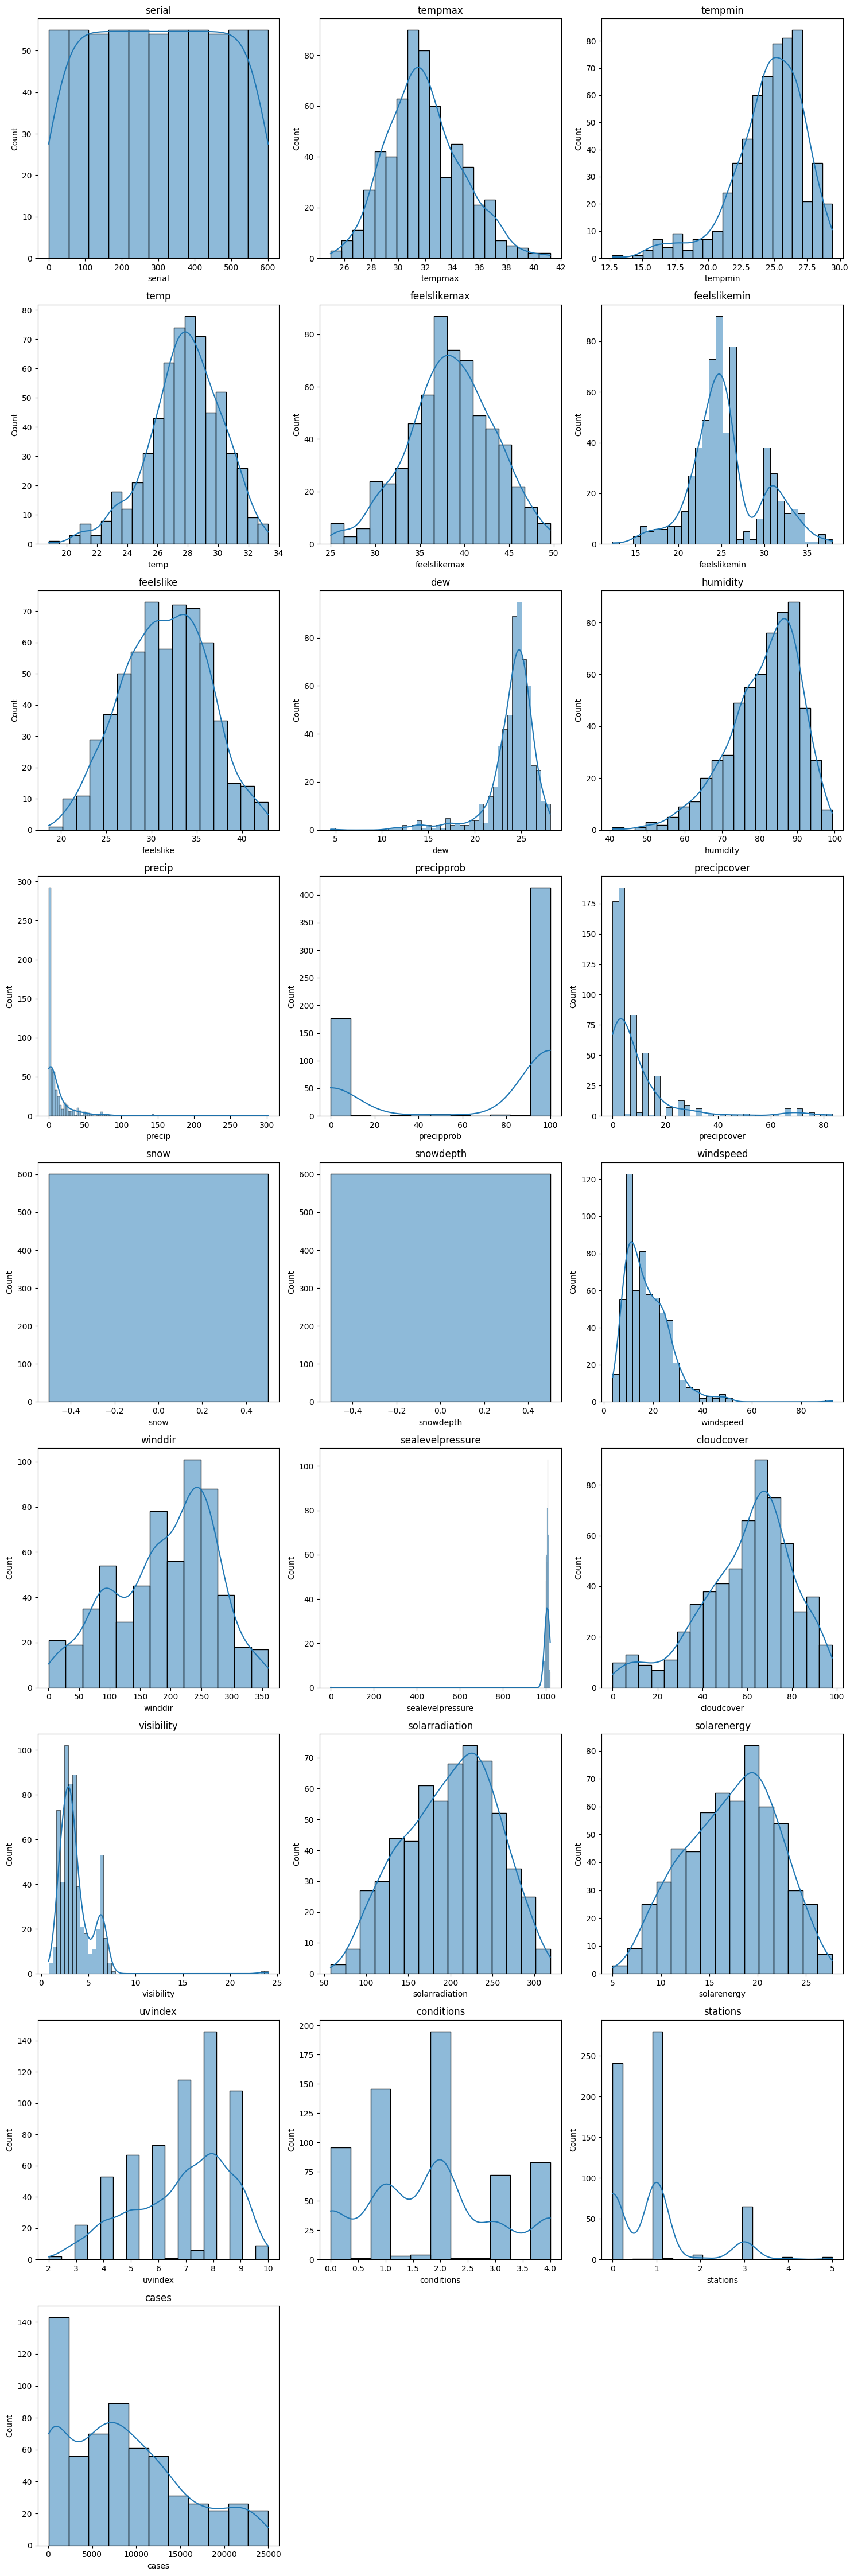

In [13]:
num_cols = len(df.select_dtypes(include=[np.number]).columns)

num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Z wizualizacji wynika, że liczba przypadków ma tendencję spadkową.

Korelacja między cechami:

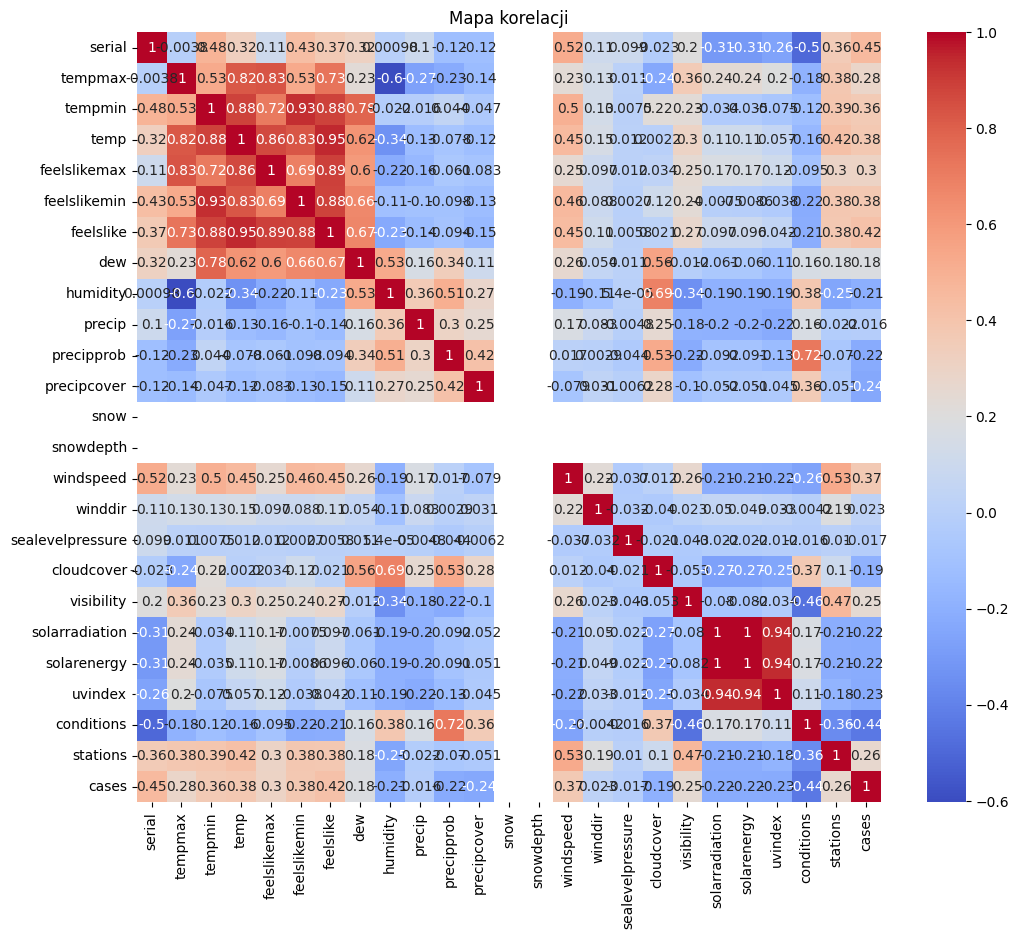

In [14]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa korelacji')
plt.show()

Z mapy korelacji mogę wywnioskować, że wilgotność ma duży wpływ na punkt rosy, pokrycie chmurami i ogólne warunki pogodowe. Pokrycie chmurami wpływa na indeks UV oraz wilgotność. Prędkość wiatru jest powiązana z temperaturą łączoną.

Relacje między cechami a zmienną docelową:

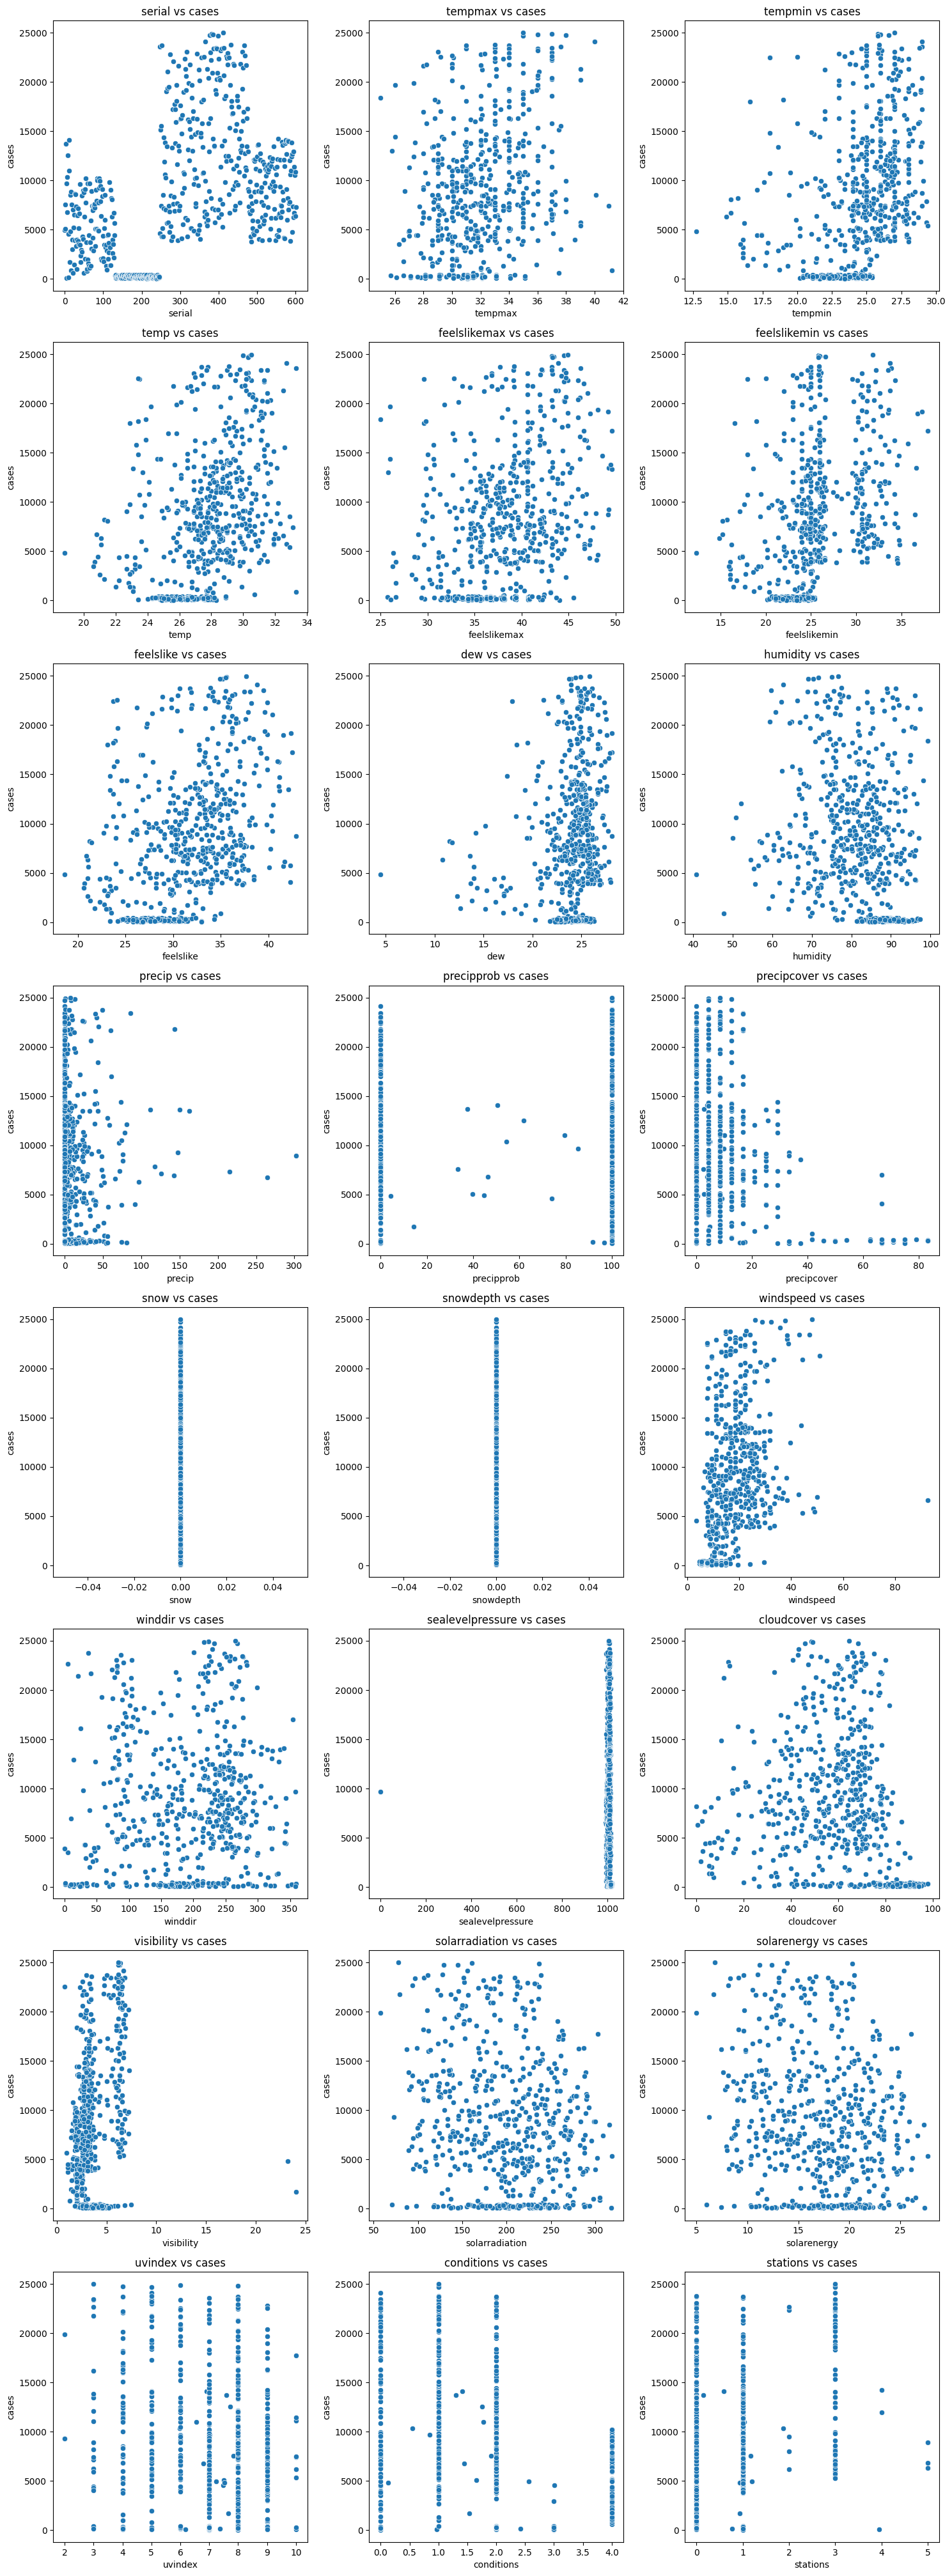

In [15]:
target = 'cases'
features = df.select_dtypes(include=[np.number]).columns.drop(target)
plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(features):
    plt.subplot(num_rows, 3, i+1)
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
plt.tight_layout()
plt.show()

Wydaje się, że istnieje pewna pozytywna zależność między punktem rosy a liczbą przypadków, z większą liczbą przypadków przy wyższych wartościach punktu rosy. Zmienna wilgotność nie pokazuje wyraźnej korelacji z liczbą przypadków. Przypadki występują w szerokim zakresie wilgotności. Wydaje się, że liczba przypadków jest większa przy niższych wartościach opadów. Większa liczba przypadków występuje przy różnych wartościach pokrycia chmurami.

Identyfikacja anomali i wartości odstających:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

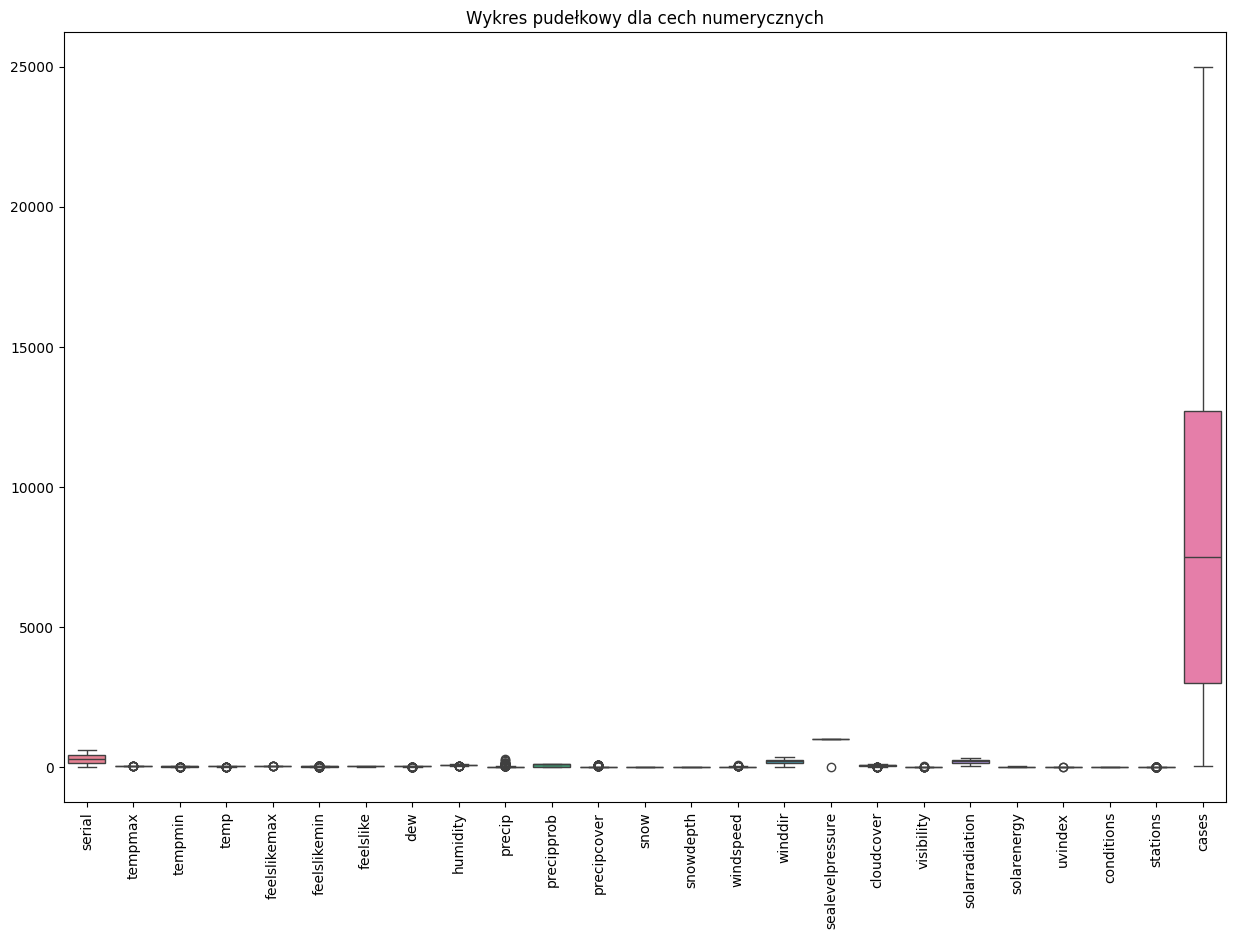

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title('Wykres pudełkowy dla cech numerycznych')
plt.show()

Większość zmiennych nie wykazuje wyraźnych wartości odstających, jednak kilka zmiennych, takich jak precip, precipcover, windspeed, sealevelpressure, visibility, solarradiation, solarenergy, stations, i cases mają wartości odstające, co sugeruje, że w niektórych przypadkach te zmienne przyjmują wartości znacznie różniące się od typowych.
Największa zmienność i wartości odstające widoczne są w liczbie przypadków (cases), co sugeruje znaczną niejednorodność w danych dotyczących przypadków.

Czyszczenie danych:

In [17]:
print(df.isnull().sum())

serial              0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
conditions          0
stations            0
cases               0
labels              0
dtype: int64


Moje kolumny nie mają brakujących danych, więc nie muszę nic usuwać.

Radzenie sobie z wartościami odstającymi:

In [18]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

columns_to_process = ['precip', 'precipcover', 'windspeed', 'sealevelpressure', 'visibility', 'solarradiation', 'solarenergy', 'stations', 'cases']

for col in columns_to_process:
    df = replace_outliers_with_median(df, col)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

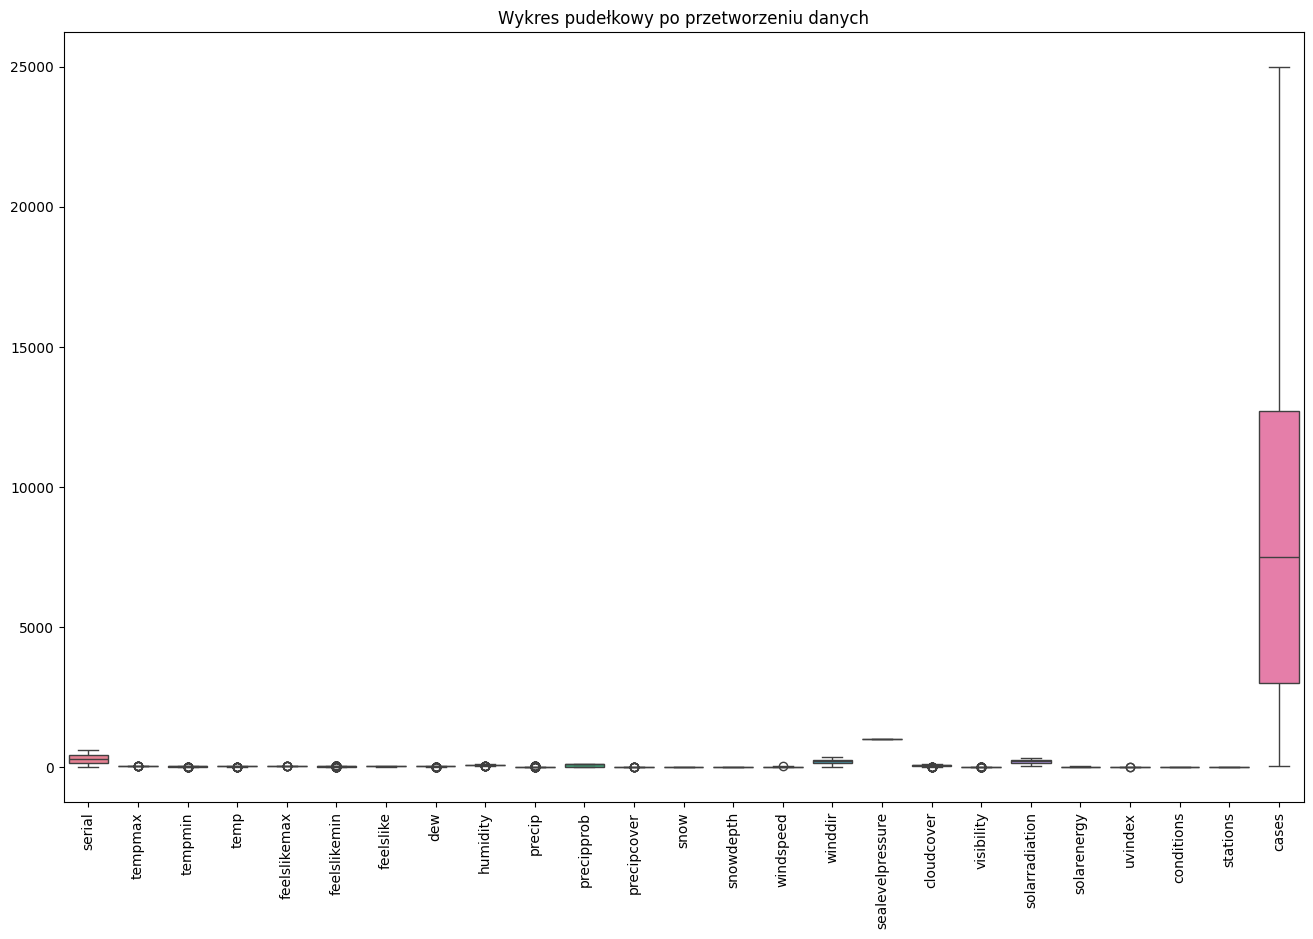

In [19]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df)
plt.title('Wykres pudełkowy po przetworzeniu danych')
plt.xticks(rotation=90)
plt.show()

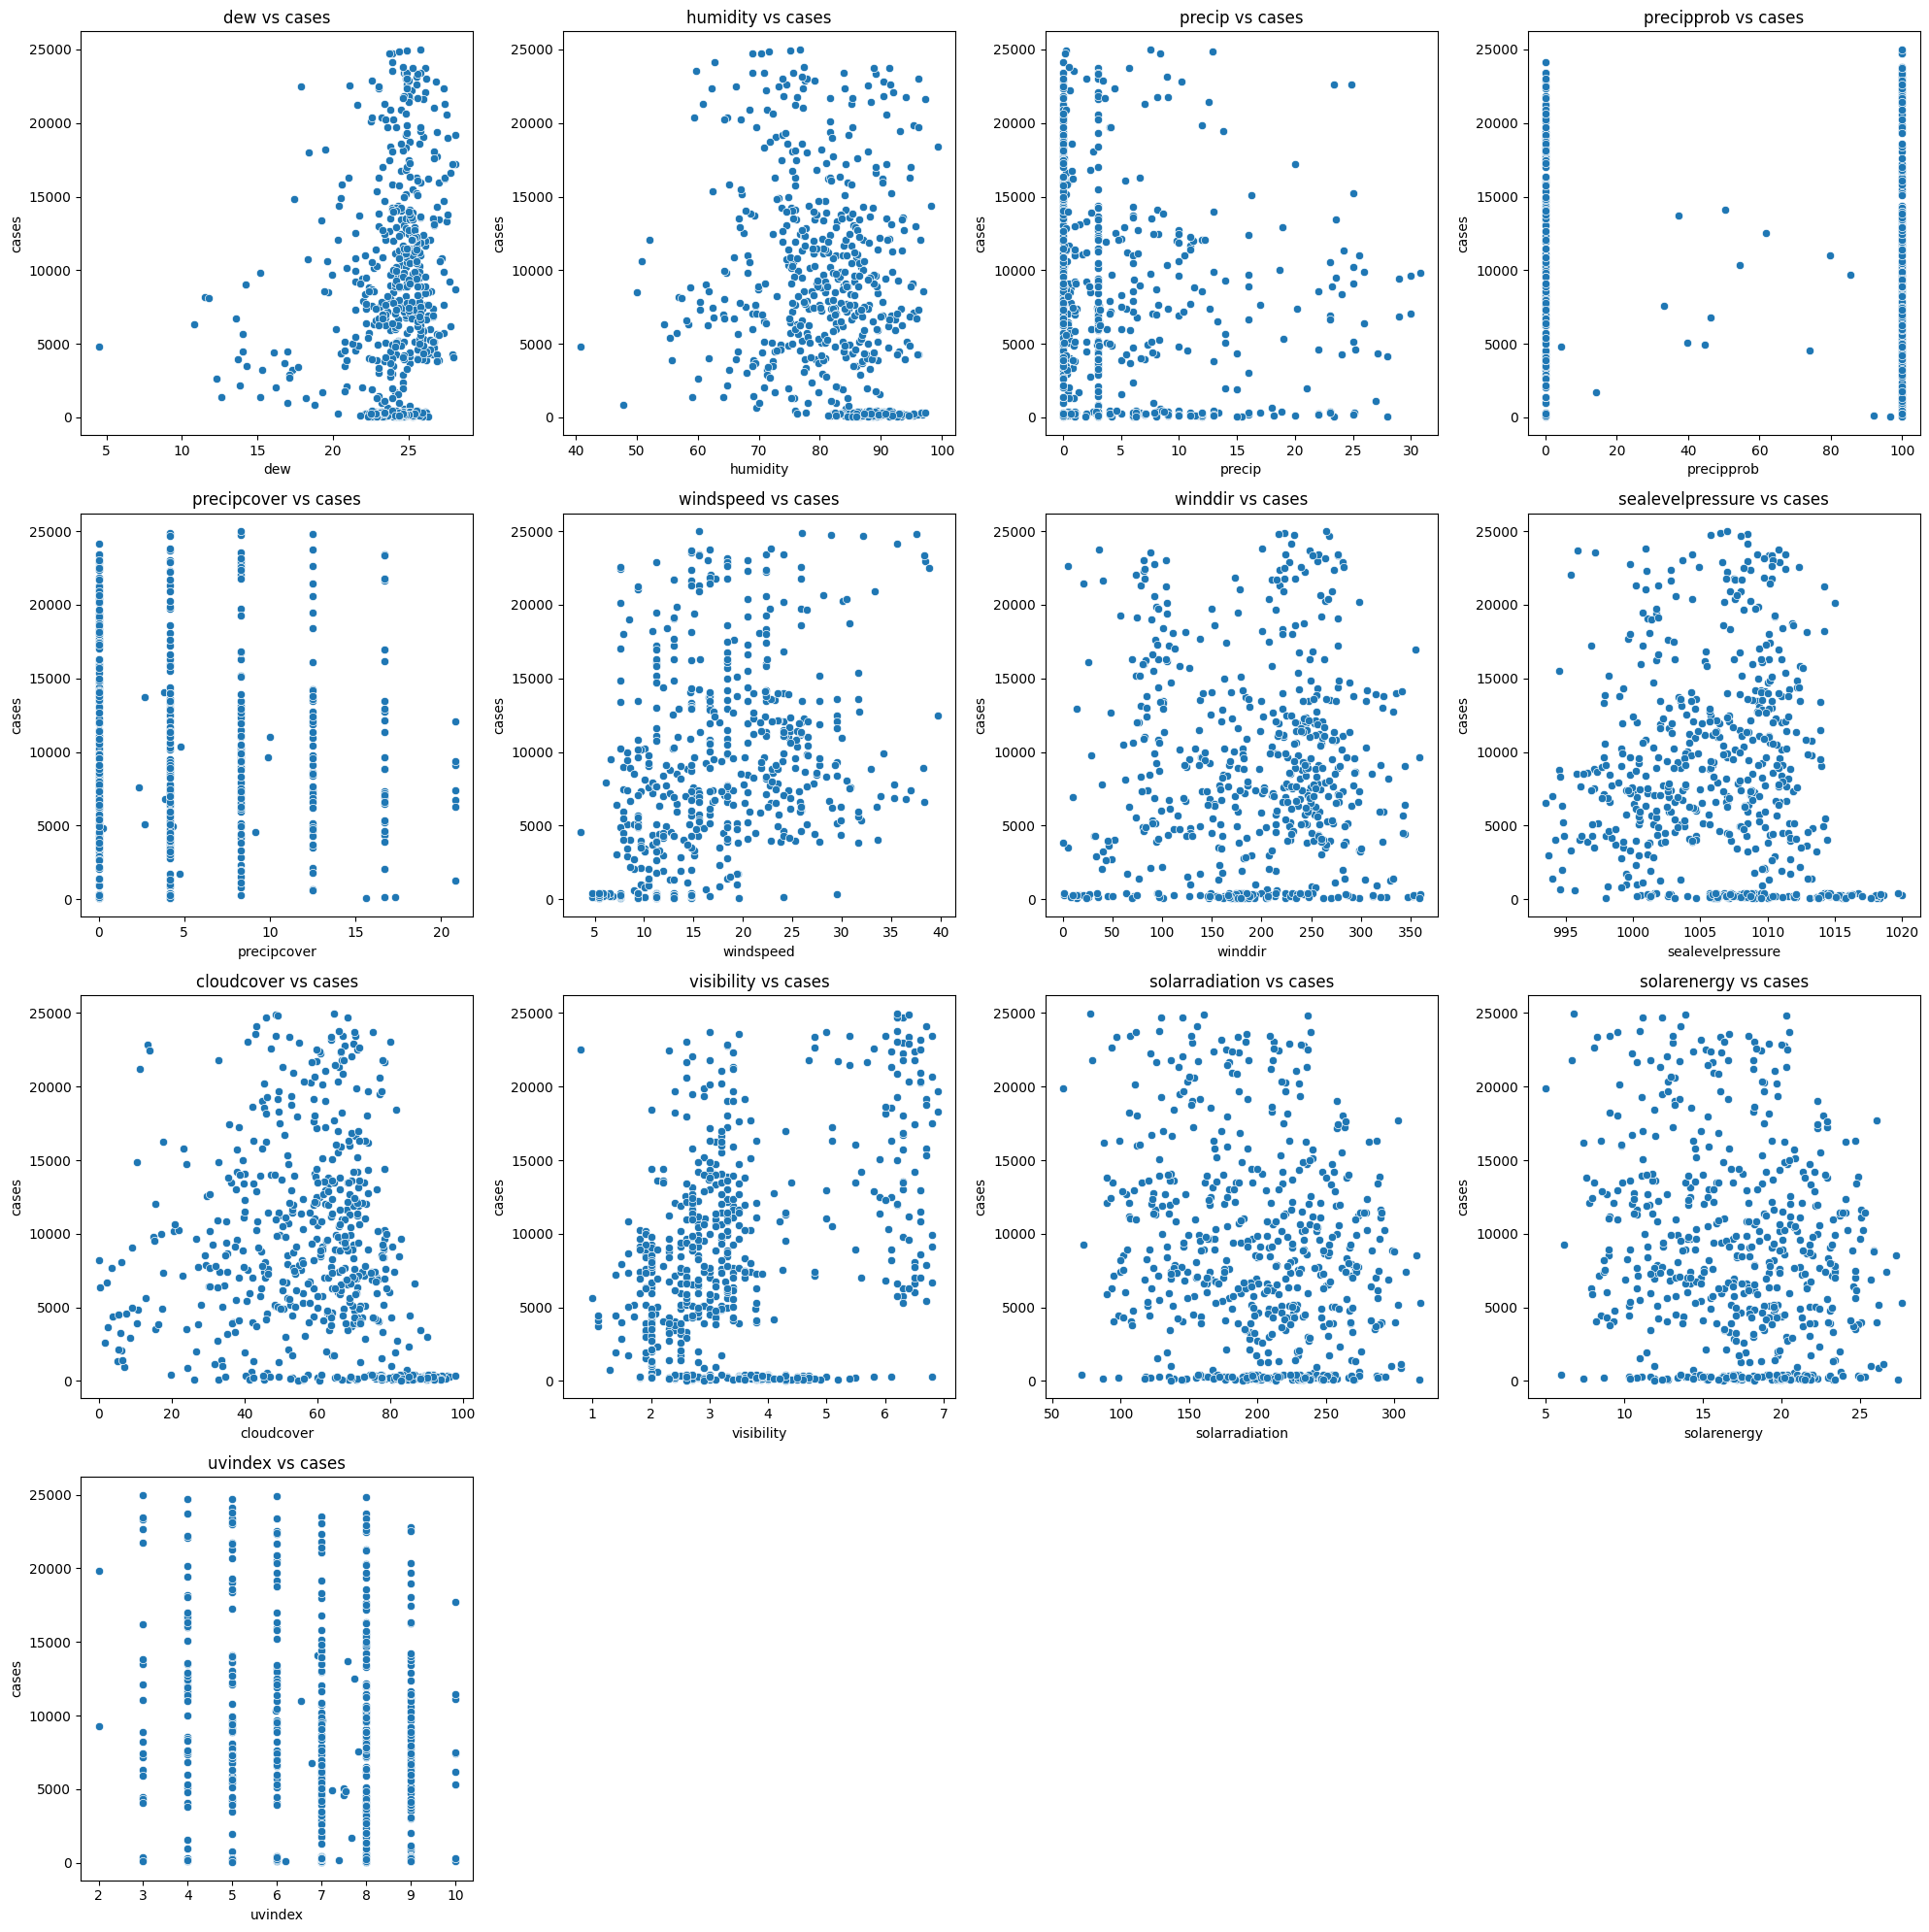

In [20]:

# Stworzenie scatter plotów dla kluczowych zmiennych po przetworzeniu danych
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
columns_to_plot = ['dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex']

for i, col in enumerate(columns_to_plot):
    sns.scatterplot(ax=axes[i//4, i%4], data=df, x=col, y='cases')
    axes[i//4, i%4].set_title(f'{col} vs cases')

# Usunięcie pustych wykresów, jeśli liczba kolumn jest mniejsza niż liczba subplotów
for j in range(i + 1, 16):
    fig.delaxes(axes[j//4, j%4])

plt.tight_layout()
plt.show()

Stworzenie nowych cech dla poprawy przewidywania modelu



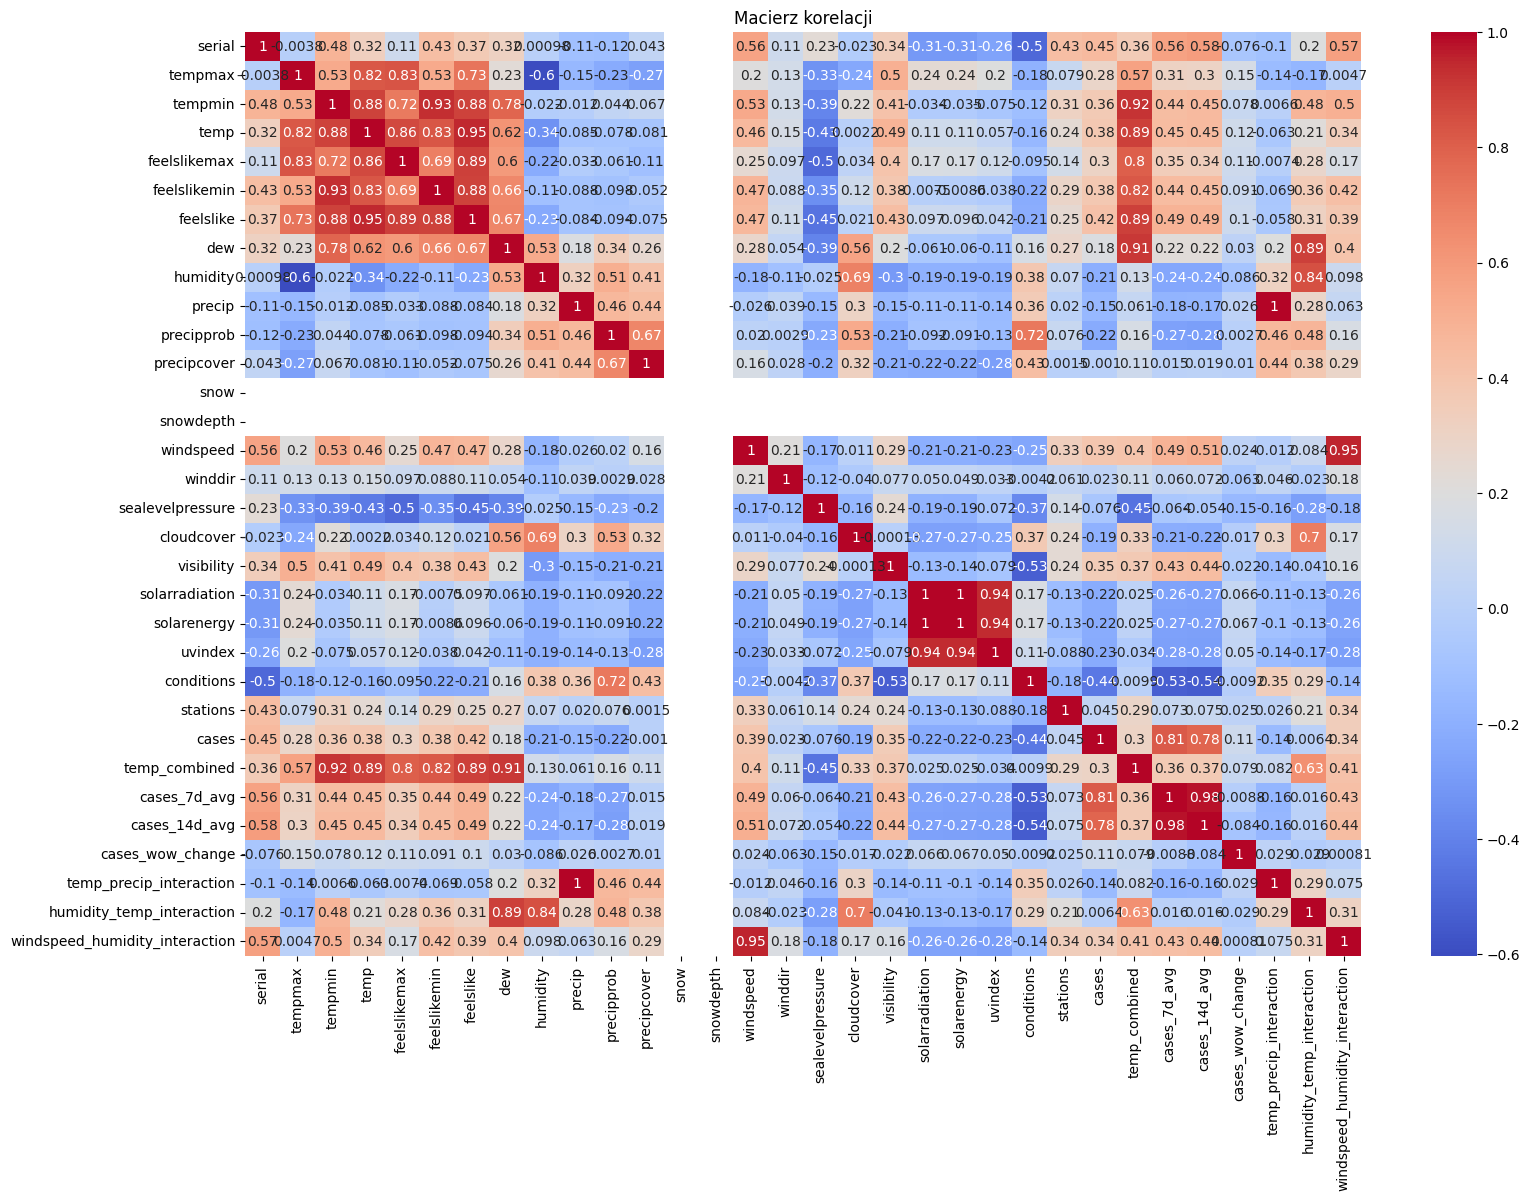

In [21]:
# Definiowanie temp_combined jako średnia z temp i dew
df['temp_combined'] = (df['temp'] + df['dew']) / 2

# Cechy historyczne
df['cases_7d_avg'] = df['cases'].rolling(window=7).mean()
df['cases_14d_avg'] = df['cases'].rolling(window=14).mean()
df['cases_wow_change'] = df['cases'].pct_change(periods=7)

# Interakcje między cechami
df['temp_precip_interaction'] = df['temp_combined'] * df['precip']
df['humidity_temp_interaction'] = df['humidity'] * df['temp_combined']
df['windspeed_humidity_interaction'] = df['windspeed'] * df['humidity']

numeric_df = df.select_dtypes(include=[np.number])

# Tworzenie macierzy korelacji
plt.figure(figsize=(18, 12))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['cases', 'labels'])
y = df['cases']

X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("Rozmiary zbiorów:")
print(f"Treningowy: {X_train.shape[0]} próbek")
print(f"Walidacyjny: {X_val.shape[0]} próbek")
print(f"Testowy: {X_test.shape[0]} próbek")

Rozmiary zbiorów:
Treningowy: 353 próbek
Walidacyjny: 118 próbek
Testowy: 118 próbek



###Aby przeprowadzić eksperymenty z różnymi modelami, wykonam następujące kroki:

Zbadam różne modele: regresję liniową, drzewo decyzyjne, las losowy i sieci neuronowe. Użyję walidacji krzyżowej do oceny modeli i Keras do zdefiniowania i trenowania sieci neuronowej.



Regresja liniowa:

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test - MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R^2: {r2_test}')

Test - MSE: 17859188.486484714, RMSE: 4226.013308839043, MAE: 3019.183765217567, R^2: 0.567217376210452


Wysokie wartości MSE i RMSE wskazują, że model ma duże błędy predykcji. Model albo nie jest dobrze dopasowany do danych, albo dane mają dużą zmienność, której model nie jest w stanie wychwycić. Wysoka wartość MAE wskazuje, że średni błąd predykcji jest również wysoki, co potwierdza, że model ma problemy z dokładnością. Niska wartość Rˆ2 sugeruje, że model nie wyjaśnia dobrze zmienności danych.

Drzewo decyzyjne i ocena wydajności modelu:

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

y_test_pred = dt.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_scores = cross_val_score(dt, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-rmse_scores)

print(f'Cross-Validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}')

print(f'Test - MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R^2: {r2_test}')

Cross-Validation RMSE: 4403.038985201503 ± 387.70441003981773
Test - MSE: 17359265.457627118, RMSE: 4166.445182361952, MAE: 2635.6610169491523, R^2: 0.5793320364194274


Wysokie wartości RMSE i MAE wskazują, że model ma dość duże błedy predykcji. Wartości te są dość wysokie, co sugeruje, że model nie jest bardzo dokładny. Niska wartość Rˆ2 sugeruje, że model nie wyjaśnia dobrze zmienności danych. Może to oznaczać, że model jest zbyt prosty. Mogłabym dodać więcej cech do modelu, które mogą lepiej wyjaśniać zmienność danych. Podsumowując, model drzewa decyzyjnego nie jest bardzo dokładny i istnieje przestrzeń do poprawy.

Las losowy i ocena wydajności modelu

In [27]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_scaled, y_train)

y_test_pred = rfr.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_scores = cross_val_score(rfr, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-rmse_scores)


print(f'Cross-Validation RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}')

print(f'Test - MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R^2: {r2_test}')

Cross-Validation RMSE: 3338.0562281370158 ± 427.7241115129845
Test - MSE: 12868789.872527119, RMSE: 3587.309559060539, MAE: 2116.820677966102, R^2: 0.6881499598795661


Wartości RMSE i MAE wskazują, że model ma umiarkowane błędy predykcji. Wartości te są stosunkowo wysokie, co sugeruje, że model nie jest bardzo dokładny. Wartość Rˆ2 sugeruje, że model wyjaśnia około połowy zmienności danych. Jest to umiarkowana wartość, co oznacza, że model ma pewną zdolność do przewidywania, ale istnieje przestrzeń do poprawy. Podsumowując, model lasu losowego ma umiarkowaną dokładność i istnieje przestrzeń do poprawy.

Sieć neuronowa z Keras

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

y = df['cases'].values
input_dim = X.shape[1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def create_model():
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

    y_val_pred = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    rmse_scores.append(rmse_val)

print(f'RMSE scores: {rmse_scores}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')

X_test_scaled = scaler.transform(X_test)

y_test_pred = model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test - MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R^2: {r2_test}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE scores: [6504.011736750495, 6609.204289193996, 5811.858320995456, 6205.419267065428, 6443.601804848024]
Mean RMSE: 6314.819083770681
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test - MSE: 40401205.25682726, RMSE: 6356.194243163692, MAE: 4649.221101075916, R^2: 0.020955536219249504


Model ma dość wysokie wartości RMSE i MAE, co sugeruje, że jego predykcje są dość odległe od rzeczywistych wartości. Niska wartość R² wskazuje, że model nie wyjaśnia dobrze zmienności w danych. Może to sugerować, że model jest zbyt prosty lub że dane mają złożone wzorce, które nie są dobrze uchwycone przez obecny model.


Model klasyfikacji i ocena modelu

X shape: (589, 31)
y shape: (589,)
Corrected y shape: (589,)
Synchronized X shape: (589, 31)
Synchronized y shape: (589,)
Unique y_train labels: [25 26 29]
Unique y_test labels: [25 26 29]
Mapped y_train labels: [0 1 2]
Mapped y_test labels: [0 1 2]
X_train_scaled shape: (471, 31)
y_train shape: (471,)
X_train_scaled shape before fit: (471, 31)
y_train shape before fit: (471,)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy: 0.8389830508474576
Precision: 0.8633392751039809
Recall: 0.8687423687423688
F1-score: 0.8645047479638178


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


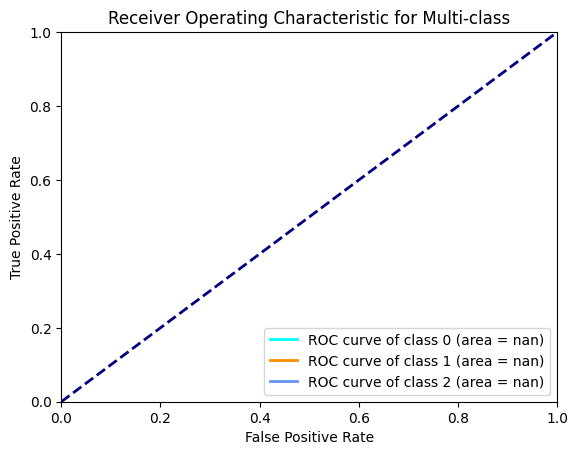

In [56]:
import numpy as np
import random
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y, axis=1)

print(f'Corrected y shape: {y.shape}')

min_samples = min(len(X), len(y))
X = X[:min_samples]
y = y[:min_samples]

print(f'Synchronized X shape: {X.shape}')
print(f'Synchronized y shape: {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(f'Unique y_train labels: {np.unique(y_train)}')
print(f'Unique y_test labels: {np.unique(y_test)}')

unique_labels = np.unique(y_train)
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])

print(f'Mapped y_train labels: {np.unique(y_train)}')
print(f'Mapped y_test labels: {np.unique(y_test)}')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'X_train_scaled shape: {X_train_scaled.shape}')
print(f'y_train shape: {y_train.shape}')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

def create_classification_model(input_dim, num_classes):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(np.unique(y_train))
model = create_classification_model(X_train_scaled.shape[1], num_classes)

print(f'X_train_scaled shape before fit: {X_train_scaled.shape}')
print(f'y_train shape before fit: {y_train.shape}')

model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)

y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()

Model osiągnął wysoką dokładność, precyzję, czułość i wartość F1, co sugeruje, że dobrze radzi sobie z klasyfikacją. Ostrzeżenia dotyczące braku pozytywnych próbek w `y_true` mogą wskazywać na problemy z dystrybucją danych w zbiorze testowym.


In [68]:
results = [
    {
        'Model': 'Linear Regression',
        'RMSE': 4226.01,
        'MAE': 3019.18,
        'R^2': 0.57
    },
    {
        'Model': 'Decision Tree Regressor',
        'RMSE': 4166.45,
        'MAE': 2635.66,
        'R^2': 0.58
    },
    {
        'Model': 'Random Forest Regressor',
        'RMSE': 3587.31,
        'MAE': 2116.82,
        'R^2': 0.69
    },
    {
        'Model': 'Neural Network',
        'RMSE': 6356.19,
        'MAE': 4649.22,
        'R^2': 0.02
    },

]

classification_results = {
    'Model': 'Classification Model',
    'Accuracy': 0.8389830508474576,
    'Precision': 0.8633392751039809,
    'Recall': 0.8687423687423688,
    'F1-score': 0.8645047479638178
}

results_df = pd.DataFrame(results)
classification_results_df = pd.DataFrame([classification_results])
print(results_df)
print(classification_results_df)

                     Model     RMSE      MAE   R^2
0        Linear Regression  4226.01  3019.18  0.57
1  Decision Tree Regressor  4166.45  2635.66  0.58
2  Random Forest Regressor  3587.31  2116.82  0.69
3           Neural Network  6356.19  4649.22  0.02
                  Model  Accuracy  Precision    Recall  F1-score
0  Classification Model  0.838983   0.863339  0.868742  0.864505


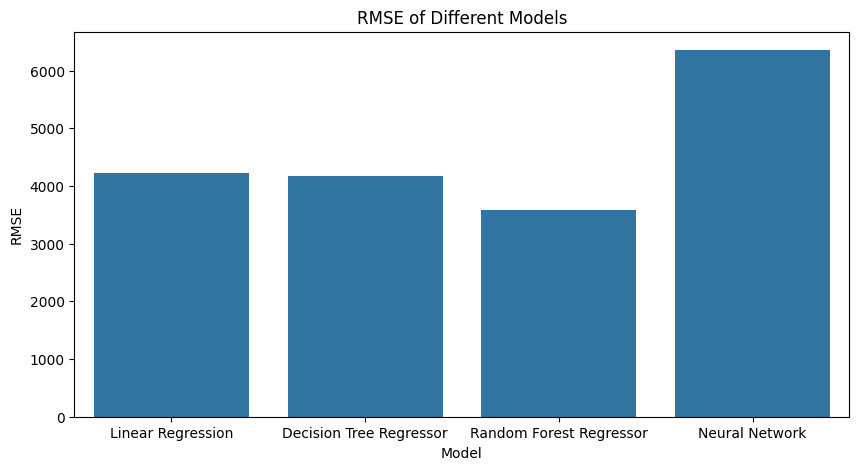

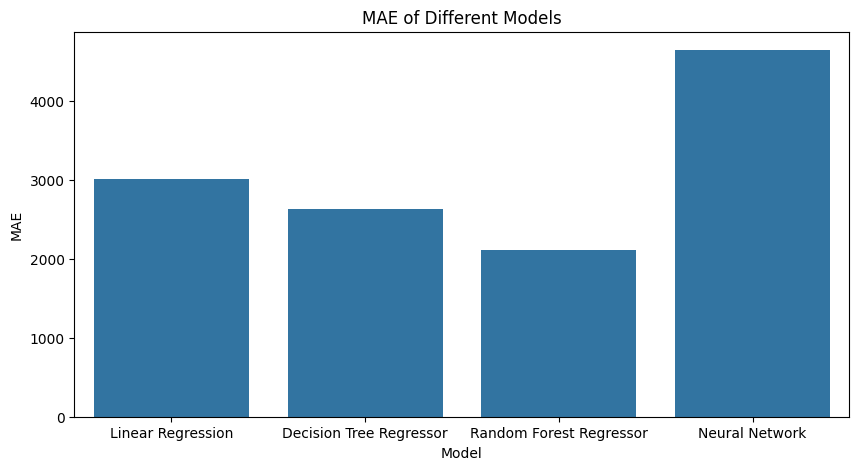

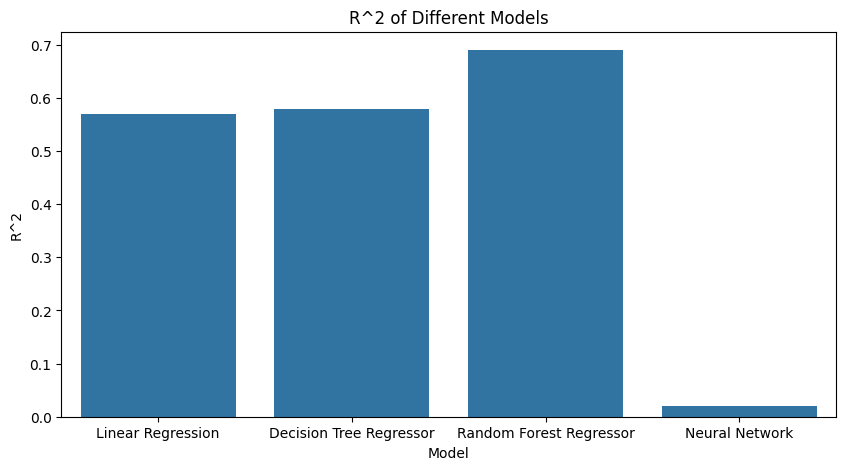

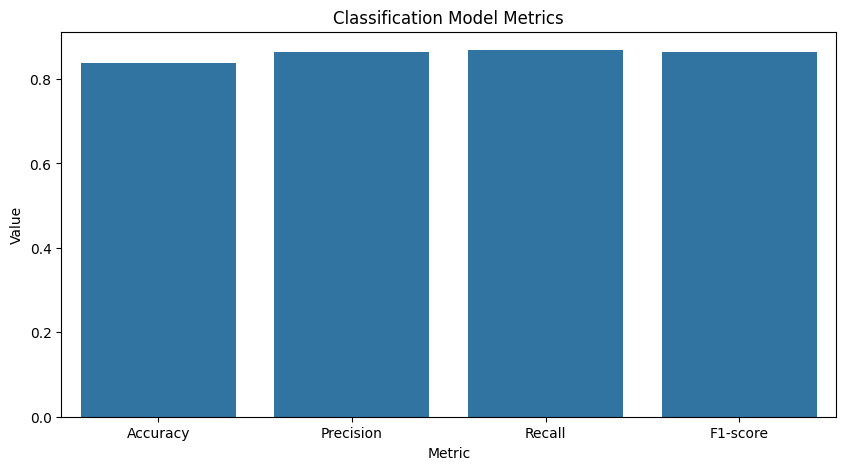

In [71]:

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('RMSE of Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('MAE of Different Models')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R^2', data=results_df)
plt.title('R^2 of Different Models')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.show()


plt.figure(figsize=(10, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [classification_results[metric] for metric in metrics]
sns.barplot(x=metrics, y=values)
plt.title('Classification Model Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()